# Introduction to Linear Regresssion

Introduction to Linear Regression
In this tutorial, we'll discuss one of the foundational algorithms in machine learning: Linear regression. We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:

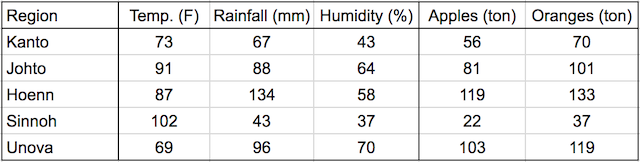

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1

yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:
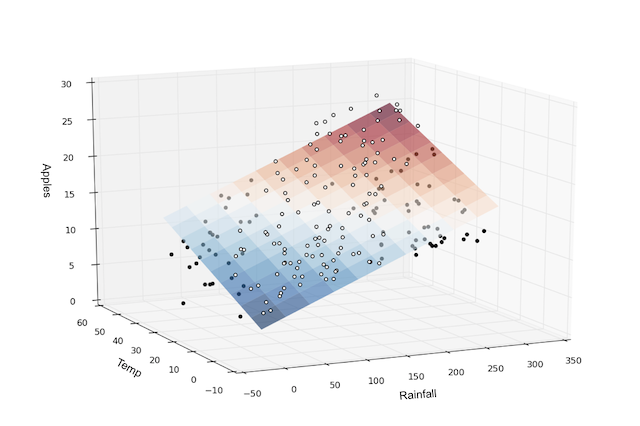

The learning part of linear regression is to figure out a set of weights w11, w12,... w23, b1 & b2 using the training data, to make accurate predictions for new data. The learned weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region.

We'll train our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called gradient descent. Let's begin by importing Numpy and PyTorch.

In [43]:
import numpy as np
import torch

# Training Data
 We can represent the training data using two matrics: inputs and targets, each with one row per observation, and one column per variable.

In [44]:
# input (temp, rainfall, humidity)
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]], dtype = 'float32')


In [45]:
# Target (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

We've separated the input and target variables because we'll operate on them separately. Also, we've created numpy arrays, because this is typically how you would work with training data: read some CSV files as numpy arrays, do some processing, and then convert them to PyTorch tensors.

Let's convert the arrays to PyTorch tensors.

In [46]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


#Linear regression model from scratch


---


The weights and biases (w11, w12,... w23, b1 & b2) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [47]:
# Weights and biases
w = torch.randn(2,3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2869,  0.0620, -0.7612],
        [-0.4567,  0.2772,  0.1938]], requires_grad=True)
tensor([-0.5493, -0.1654], requires_grad=True)


torch.randn creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b (replicated for each observation).

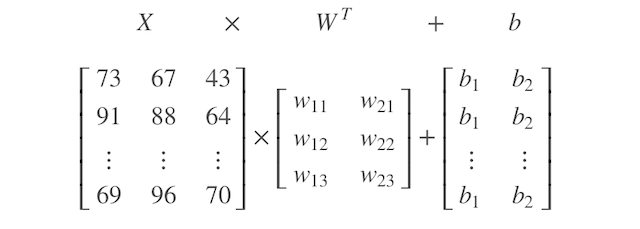

We can define the model as follows:

In [48]:
def model(x):
  return x @ w.t() + b

@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [49]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -8.1872,  -6.5995],
        [-17.7073,  -4.9297],
        [-11.4361,   8.4835],
        [  3.2112, -27.6568],
        [-28.0896,   8.4965]], grad_fn=<AddBackward0>)


Let's compare the predictions of our model with the actual targets.

In [50]:
# compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


You can see a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work.

# Loss Function

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

Calculate the difference between the two matrices (preds and targets).
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
The result is a single number, known as the mean squared error (MSE).

In [51]:
# MSE loss
def mse(t1,t2):
  diff= t1 - t2
  return torch.sum(diff * diff)/ diff.numel()

torch.sum returns the sum of all the elements in a tensor. The .numel method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.

In [52]:
# compute loss
loss = mse(preds,targets)
print(loss)

tensor(9739.8691, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

# Computer gradients
With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have requires_grad set to True. We'll see how this is useful in just a moment.

In [53]:
#computer gradients
loss.backward()

The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

In [54]:
#Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.2869,  0.0620, -0.7612],
        [-0.4567,  0.2772,  0.1938]], requires_grad=True)
tensor([[-7195.5234, -8771.5488, -5302.8140],
        [-8056.8086, -8905.5557, -5484.5576]])


#Adjust weights and biases to reduce the loss
The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

increasing the weight element's value slightly will increase the loss

decreasing the weight element's value slightly will decrease the loss

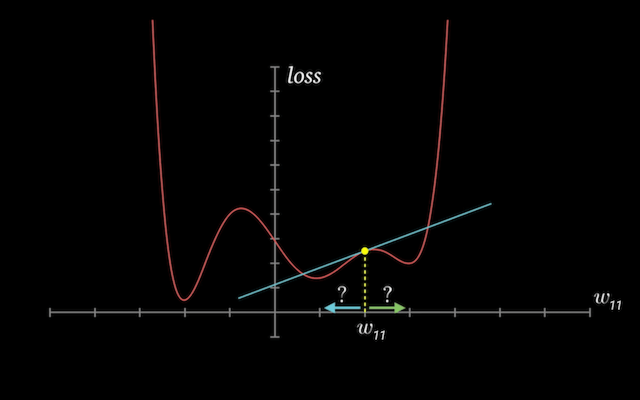

If a gradient element is negative:

increasing the weight element's value slightly will decrease the loss
decreasing the weight element's value slightly will increase the loss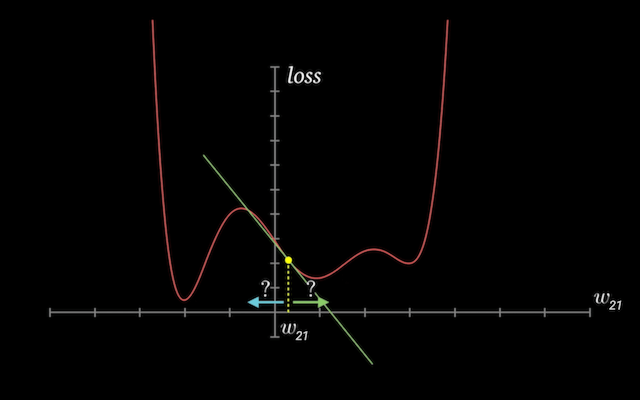

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [55]:
w 
w.grad

tensor([[-7195.5234, -8771.5488, -5302.8140],
        [-8056.8086, -8905.5557, -5484.5576]])

In [56]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

We multiply the gradients with a very small number (10^-5 in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.

We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [57]:
# lets verify that the loss is actually lower
loss = mse(preds,targets)
print(loss)

tensor(9739.8691, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the .zero_() method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke .backward on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [58]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])




---
# Train the model using gradient descent


As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can train the model using the following steps:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero


Let's implement the above step by step.

In [59]:
# generate predictions
preds = model(inputs)
print(preds)

tensor([[  5.2235,   7.6080],
        [ -0.0458,  13.7499],
        [  9.6544,  30.6083],
        [ 16.2853, -13.5792],
        [-10.9911,  26.4452]], grad_fn=<AddBackward0>)


In [60]:
# calcuate the loss
loss = mse(preds, targets)
print(loss)

tensor(6724.3789, grad_fn=<DivBackward0>)


In [61]:
# compute the gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-5808.6396, -7275.0479, -4380.6367],
        [-6589.5620, -7327.7842, -4511.1689]])
tensor([-72.1747, -79.0335])


Let's update the weights and biases using the gradients computed above.

In [62]:
# adjust the weights and reset gradients
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5 
  w.grad.zero_()
  b.grad.zero_()

Let's take a look at the new weights and biases

In [63]:
print(w)
print(b)

tensor([[ 0.4169,  0.2225, -0.6644],
        [-0.3102,  0.4395,  0.2937]], requires_grad=True)
tensor([-0.5476, -0.1637], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [64]:
# calculate the loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(4690.5146, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.

#Train for multiple epochs

To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch. Let's train the model for 1000 epochs.

In [92]:
# train the model for 1000 epoches
for i in range(200000):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [93]:
#calcuate loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(0.5046, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [91]:
# predictions
preds

tensor([[ 57.0734,  70.2815],
        [ 82.2644, 100.6874],
        [118.7081, 132.9630],
        [ 21.0929,  37.0186],
        [101.9058, 119.1335]], grad_fn=<AddBackward0>)

In [82]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.

In [94]:
import pickle

In [95]:
#save the trined model as a pickle string
saved_model = pickle.dumps(model)

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(knn, 'filename.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('filename.pkl') 
  
# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

In [96]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [97]:
joblib.dump(model, 'modellr.pkl')


['modellr.pkl']